In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
a = np.random.rand(2,3, 6)
b = a.ravel()
print(a)
print(b)

In [18]:
D = np.random.randn(1000, 500)
n_hidden = [500] * 10
nonlinearity = ['tanh'] * len(n_hidden)
bngain = np.ones((1, n_hidden[0]))
bnbias = np.zeros((1, n_hidden[0]))

act = {'tanh': lambda x: np.tanh(x), 'relu': lambda x: np.maximum(0, x)}
Hs = {}

for i in range(len(n_hidden)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = n_hidden[i]
    W = np.random.randn(fan_in, fan_out) * 0.01 #  / np.sqrt(fan_in)
    H = np.dot(X, W)
    bnmeani = H.mean(axis=0, keepdims=True)
    bnstdi = H.std(axis=0, keepdims=True)
    xhat = (H - bnmeani) / bnstdi
    bnout = bngain * xhat + bnbias
    H = act[nonlinearity[i]](bnout)
    Hs[i] = H

input layer has mean: 0.001, std: 1.000
hidden layer 1 has mean: -0.000, std: 0.628
hidden layer 2 has mean: 0.000, std: 0.628
hidden layer 3 has mean: 0.000, std: 0.629
hidden layer 4 has mean: 0.000, std: 0.629
hidden layer 5 has mean: 0.000, std: 0.629
hidden layer 6 has mean: 0.000, std: 0.629
hidden layer 7 has mean: 0.000, std: 0.629
hidden layer 8 has mean: -0.000, std: 0.629
hidden layer 9 has mean: -0.000, std: 0.629
hidden layer 10 has mean: 0.000, std: 0.629


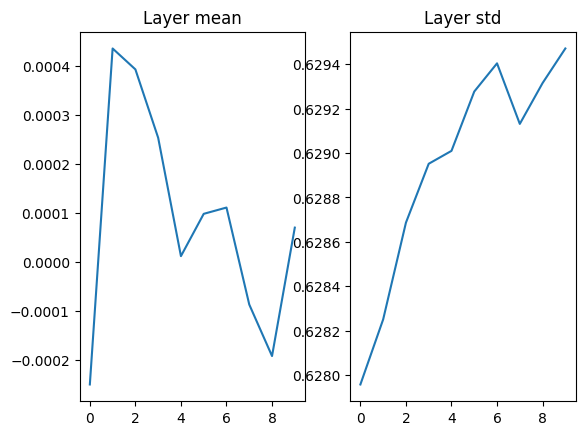

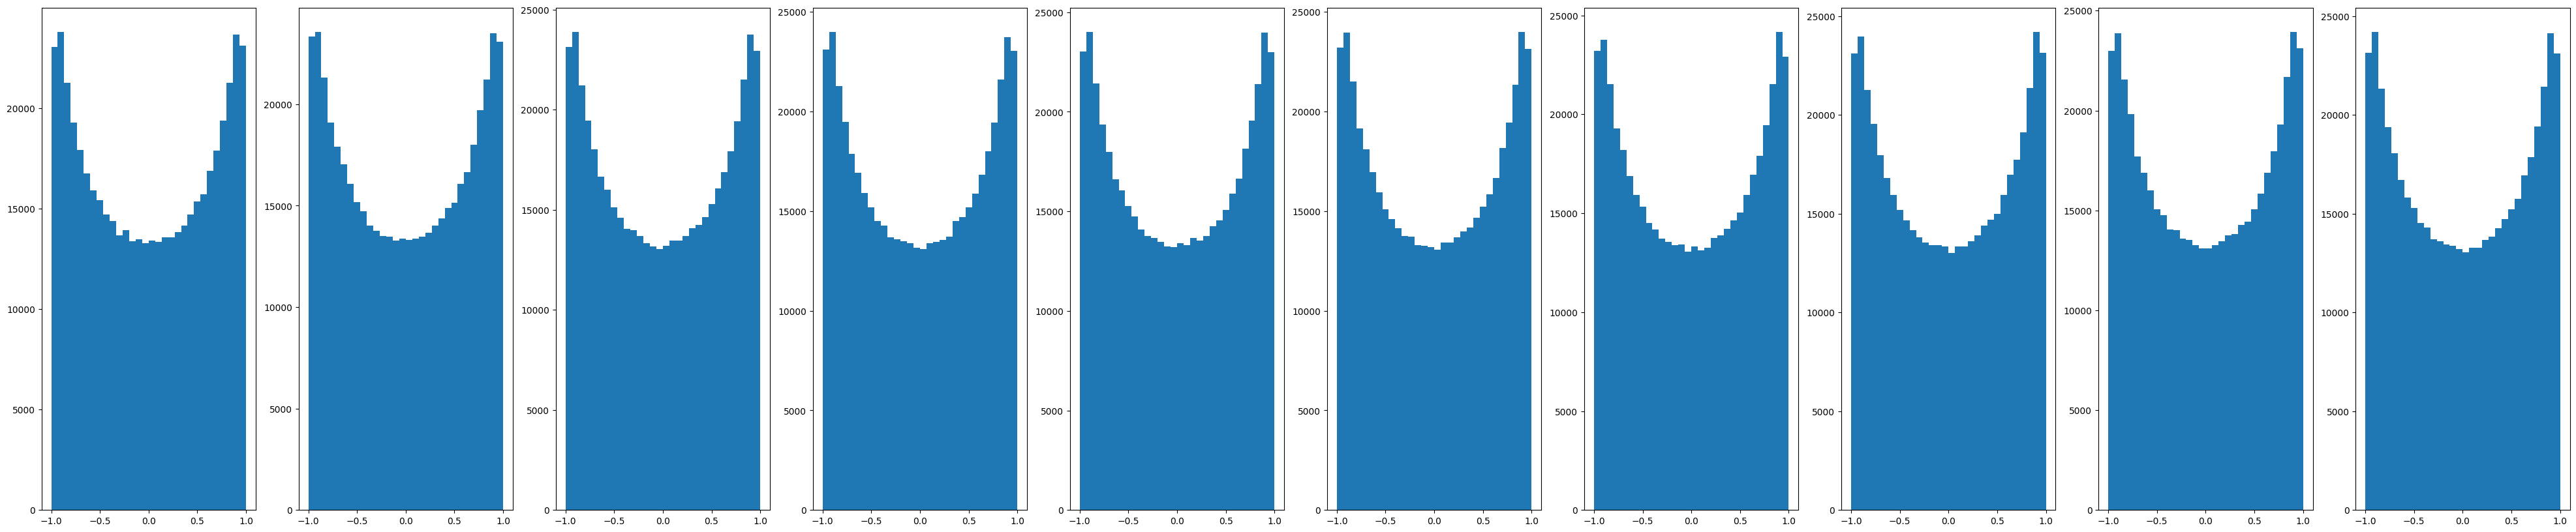

In [20]:
print(f"input layer has mean: {D.mean().item():.3f}, std: {D.std().item():.3f}")

layer_mean = [np.mean(H) for H in Hs.values()]
layer_std = [np.std(H) for H in Hs.values()]

for i, H in enumerate(Hs):
    print(f"hidden layer {i + 1} has mean: {layer_mean[i]:.3f}, std: {layer_std[i]:.3f}")

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_mean, label='mean')
plt.title('Layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_std, label='std')
plt.title('Layer std')

plt.figure(figsize=(50, 10))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

In [22]:
xhat.mean(0)
xhat.std(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
## Papers need to read ##
# Xavier initialization
# N(0, 1/sqrt(fan_in))
# He Init
# Kamin Init
# BatchNorm
# Momentum based parameter update
# LeNet
# AlexNet
# VGGNet
# GoogleNet
# ResNet
# {some RNN papers}
# {some LSTM papers}

# Go to Transformer